In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import timedelta
# if using a Jupyter notebook, includue:
%matplotlib inline

import sys

In [2]:
KRI = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/kanchanaburi_pm25.csv')
KRI

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,65.2,1,0
1,2016,3,3,9,65.2,1,0
2,2016,3,3,10,64.9,1,0
3,2016,3,3,11,64.9,1,0
4,2016,3,3,12,38.4,1,0
...,...,...,...,...,...,...,...
23803,2019,2,7,5,35.0,45,0
23804,2019,2,7,6,35.0,45,0
23805,2019,2,7,7,42.0,56,0
23806,2019,2,7,8,47.0,64,0


In [3]:
RYG = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/rayongmaptaphut_pm25.csv')
RYG

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,40.6,1,0
1,2016,3,3,9,40.6,1,0
2,2016,3,3,10,40.6,1,0
3,2016,3,3,11,40.6,1,0
4,2016,3,3,12,38.7,1,0
...,...,...,...,...,...,...,...
23807,2019,2,7,5,18.0,40,0
23808,2019,2,7,6,27.0,42,0
23809,2019,2,7,7,20.0,37,0
23810,2019,2,7,8,29.0,34,0


In [4]:
NWT = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/narathiwat_pm25.csv')
NWT

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0
...,...,...,...,...,...,...,...
23810,2019,2,7,5,15.0,21,0
23811,2019,2,7,6,12.0,24,0
23812,2019,2,7,7,12.0,26,0
23813,2019,2,7,8,20.0,29,0


In [5]:
kri_pm = KRI['PM2.5']
kri_pm

0        65.2
1        65.2
2        64.9
3        64.9
4        38.4
         ... 
23803    35.0
23804    35.0
23805    42.0
23806    47.0
23807    48.0
Name: PM2.5, Length: 23808, dtype: float64

In [6]:
ryg_pm = RYG['PM2.5']
ryg_pm

0        40.6
1        40.6
2        40.6
3        40.6
4        38.7
         ... 
23807    18.0
23808    27.0
23809    20.0
23810    29.0
23811    22.0
Name: PM2.5, Length: 23812, dtype: float64

In [7]:
nwt_pm = NWT['PM2.5']
nwt_pm

0        62.9
1        62.9
2        55.5
3        55.5
4        47.9
         ... 
23810    15.0
23811    12.0
23812    12.0
23813    20.0
23814    17.0
Name: PM2.5, Length: 23815, dtype: float64

In [8]:
pm25 = pd.concat([kri_pm, ryg_pm, nwt_pm], axis = 1)
header = ['Kanchanaburi', 'Rayong', 'Narathiwat']
pm25.columns = header
pm25

,Kanchanaburi,Rayong,Narathiwat
0,65.2,40.6,62.9
1,65.2,40.6,62.9
2,64.9,40.6,55.5
3,64.9,40.6,55.5
4,38.4,38.7,47.9
...,...,...,...
23810,NaN,29.0,15.0
23811,NaN,22.0,12.0
23812,NaN,NaN,12.0
23813,NaN,NaN,20.0


In [9]:
pm25_matrix = pm25.corr()
pm25_matrix

,Kanchanaburi,Rayong,Narathiwat
Kanchanaburi,1.000000,0.665913,0.631500
Rayong,0.665913,1.000000,0.545193
Narathiwat,0.631500,0.545193,1.000000


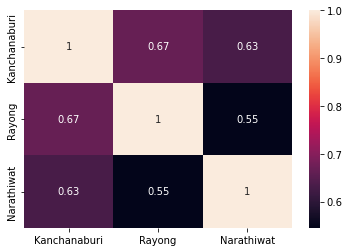

In [10]:
sns.heatmap(pm25_matrix, annot=True)
plt.show()

In [11]:
#2
kri = KRI
kri.rename(columns={'UTC Hour':'Hour'}, inplace=True)
kri['datetime'] = pd.to_datetime(kri[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7)
kri.index = kri['datetime']
kri.Hour = kri.index.hour
kri.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)
kri.head()

,Year,Month,Day,Hour,PM2.5
datetime,,,,,
2016-03-03 15:00:00,2016,3,3,15,65.2
2016-03-03 16:00:00,2016,3,3,16,65.2
2016-03-03 17:00:00,2016,3,3,17,64.9
2016-03-03 18:00:00,2016,3,3,18,64.9
2016-03-03 19:00:00,2016,3,3,19,38.4


In [12]:
ryg = RYG
ryg.rename(columns={'UTC Hour':'Hour'}, inplace=True)
ryg['datetime'] = pd.to_datetime(ryg[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7)
ryg.index = ryg['datetime']
ryg.Hour = ryg.index.hour
ryg.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)
ryg.head()

,Year,Month,Day,Hour,PM2.5
datetime,,,,,
2016-03-03 15:00:00,2016,3,3,15,40.6
2016-03-03 16:00:00,2016,3,3,16,40.6
2016-03-03 17:00:00,2016,3,3,17,40.6
2016-03-03 18:00:00,2016,3,3,18,40.6
2016-03-03 19:00:00,2016,3,3,19,38.7


In [13]:
nwt = NWT
nwt.rename(columns={'UTC Hour':'Hour'}, inplace=True)
nwt['datetime'] = pd.to_datetime(nwt[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7)
nwt.index = nwt['datetime']
nwt.Hour = nwt.index.hour
nwt.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)
nwt.head()

,Year,Month,Day,Hour,PM2.5
datetime,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9
2016-03-03 16:00:00,2016,3,3,16,62.9
2016-03-03 17:00:00,2016,3,3,17,55.5
2016-03-03 18:00:00,2016,3,3,18,55.5
2016-03-03 19:00:00,2016,3,3,19,47.9


In [14]:
kri_pv = pd.pivot_table(kri, index=kri.index.dayofyear, columns=kri.index.year,values='PM2.5', aggfunc='mean')
kri_pv

datetime,2016,2017,2018,2019
datetime,,,,
1,NaN,22.166667,23.969565,24.729167
2,NaN,19.500000,31.250000,34.583333
3,NaN,22.962500,35.725000,38.041667
4,NaN,27.608333,41.716667,42.541667
5,NaN,29.575000,46.625000,46.083333
...,...,...,...,...
362,27.325000,12.754545,NaN,NaN
363,23.878261,13.358333,NaN,NaN
364,34.037500,19.945833,NaN,NaN


In [15]:
ryg_pv = pd.pivot_table(ryg, index=ryg.index.dayofyear, columns=ryg.index.year,values='PM2.5', aggfunc='mean')
ryg_pv

datetime,2016,2017,2018,2019
datetime,,,,
1,NaN,25.054167,17.834783,12.058333
2,NaN,22.166667,19.883333,18.583333
3,NaN,22.712500,29.370833,14.458333
4,NaN,23.345833,35.950000,27.500000
5,NaN,29.220833,48.679167,36.041667
...,...,...,...,...
362,29.245833,27.568182,NaN,NaN
363,21.208696,21.100000,NaN,NaN
364,27.425000,22.933333,NaN,NaN


In [16]:
nwt_pv = pd.pivot_table(nwt, index=nwt.index.dayofyear, columns=nwt.index.year,values='PM2.5', aggfunc='mean')
nwt_pv

datetime,2016,2017,2018,2019
datetime,,,,
1,NaN,22.187500,21.995652,21.691667
2,NaN,20.433333,26.062500,18.041667
3,NaN,20.837500,32.045833,13.708333
4,NaN,25.137500,35.591667,5.500000
5,NaN,26.462500,41.770833,13.166667
...,...,...,...,...
362,27.770833,21.618182,NaN,NaN
363,33.321739,18.612500,NaN,NaN
364,32.800000,18.825000,NaN,NaN


<AxesSubplot:title={'center':'Kanchanaburi PM2.5 Daily Average Yearly comparison'}, xlabel='datetime'>

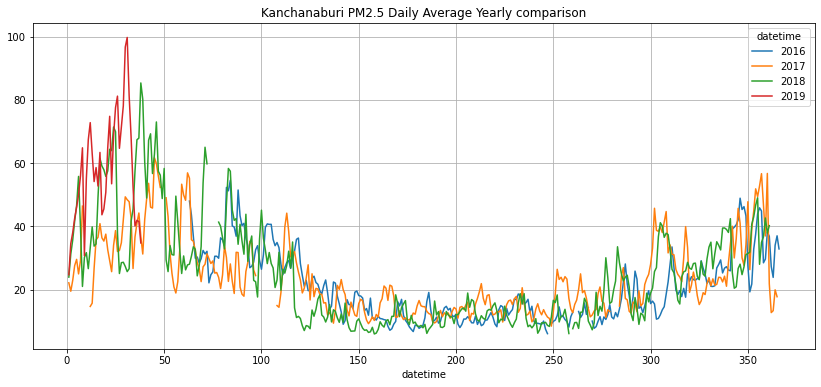

In [17]:
kri_pv.plot(title="Kanchanaburi PM2.5 Daily Average Yearly comparison",figsize=(14,6), grid=True)

<AxesSubplot:title={'center':'Rayong PM2.5 Daily Average Yearly comparison'}, xlabel='datetime'>

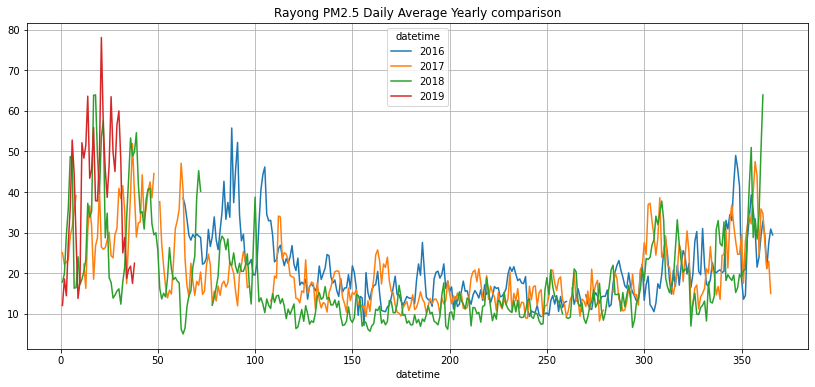

In [18]:
ryg_pv.plot(title="Rayong PM2.5 Daily Average Yearly comparison",figsize=(14,6), grid=True)

<AxesSubplot:title={'center':'Narathiwat PM2.5 Daily Average Yearly comparison'}, xlabel='datetime'>

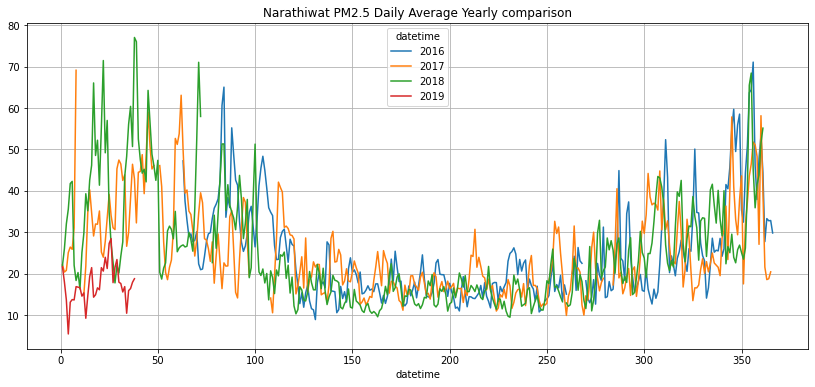

In [19]:
nwt_pv.plot(title="Narathiwat PM2.5 Daily Average Yearly comparison",figsize=(14,6), grid=True)

In [20]:
#3
arr = []
for i in KRI['PM2.5']:
    if i<50:
        arr.append('Normal')
    elif i<100:
        arr.append('Moderate')
    else:
        arr.append('Abnormal')
KRI['size'] = arr
KRI.head()

,Year,Month,Day,Hour,PM2.5,size
datetime,,,,,,
2016-03-03 15:00:00,2016,3,3,15,65.2,Moderate
2016-03-03 16:00:00,2016,3,3,16,65.2,Moderate
2016-03-03 17:00:00,2016,3,3,17,64.9,Moderate
2016-03-03 18:00:00,2016,3,3,18,64.9,Moderate
2016-03-03 19:00:00,2016,3,3,19,38.4,Normal


In [21]:
KRI_size = KRI.groupby(by=KRI['size']).sum()
KRI_size

,Year,Month,Day,Hour,PM2.5
size,,,,,
Abnormal,165543,105,2030,1046,9042.6
Moderate,3650351,6739,27280,17180,115766.3
Normal,44207848,151402,345359,256091,453664.6


Text(0.5, 1.0, 'Level of PM2.5 in Kanchanaburi')

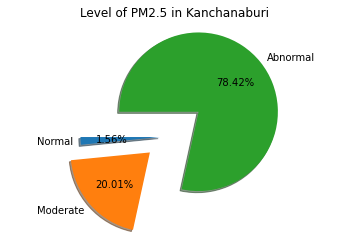

In [22]:
explode = (0.1, 0.3, 0.5)
l = ('Normal', 'Moderate', 'Abnormal')
fig, ax = plt.subplots()
ax.pie(KRI_size['PM2.5'],
       explode=explode,
       labels=l,
       autopct='%1.2f%%',
       shadow=True,
       startangle=180)
ax.axis('equal')
ax.set_title('Level of PM2.5 in Kanchanaburi')

In [23]:
arr = []
for i in RYG['PM2.5']:
    if i<50:
        arr.append('Normal')
    elif i<100:
        arr.append('Moderate')
    else:
        arr.append('Abnormal')
RYG['size'] = arr
RYG.head()

,Year,Month,Day,Hour,PM2.5,size
datetime,,,,,,
2016-03-03 15:00:00,2016,3,3,15,40.6,Normal
2016-03-03 16:00:00,2016,3,3,16,40.6,Normal
2016-03-03 17:00:00,2016,3,3,17,40.6,Normal
2016-03-03 18:00:00,2016,3,3,18,40.6,Normal
2016-03-03 19:00:00,2016,3,3,19,38.7,Normal


In [24]:
RYG_size = RYG.groupby(by=RYG['size']).sum()
RYG_size

,Year,Month,Day,Hour,PM2.5
size,,,,,
Abnormal,20184,10,204,148,1098.2
Moderate,1630371,3022,13702,8194,48735.9
Normal,46381263,155239,360853,265988,428124.0


Text(0.5, 1.0, 'Level of PM2.5 in Rayong')

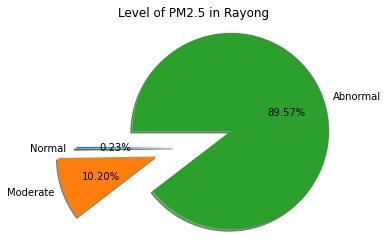

In [25]:
explode = (0.1, 0.3, 0.5)
l = ('Normal', 'Moderate', 'Abnormal')
fig, ax = plt.subplots()
ax.pie(RYG_size['PM2.5'],
       explode=explode,
       labels=l,
       autopct='%1.2f%%',
       shadow=True,
       startangle=180)
ax.axis('equal')
ax.set_title('Level of PM2.5 in Rayong')

In [26]:
arr = []
for i in NWT['PM2.5']:
    if i<50:
        arr.append('Normal')
    elif i<100:
        arr.append('Moderate')
    else:
        arr.append('Abnormal')
NWT['size'] = arr
NWT.head()

,Year,Month,Day,Hour,PM2.5,size
datetime,,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9,Moderate
2016-03-03 16:00:00,2016,3,3,16,62.9,Moderate
2016-03-03 17:00:00,2016,3,3,17,55.5,Moderate
2016-03-03 18:00:00,2016,3,3,18,55.5,Moderate
2016-03-03 19:00:00,2016,3,3,19,47.9,Normal


In [27]:
NWT_size = NWT.groupby(by=NWT['size']).sum()
NWT_size

,Year,Month,Day,Hour,PM2.5
size,,,,,
Abnormal,10089,9,69,44,538.0
Moderate,2705007,8504,20852,13813,82246.2
Normal,45322772,149781,353902,260495,502954.0


Text(0.5, 1.0, 'Level of PM2.5 in Narathiwat')

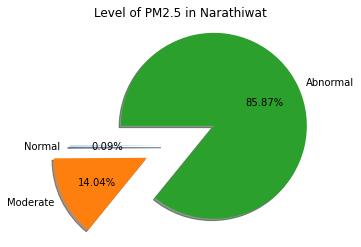

In [28]:
explode = (0.1, 0.3, 0.5)
l = ('Normal', 'Moderate', 'Abnormal')
fig, ax = plt.subplots()
ax.pie(NWT_size['PM2.5'],
       explode=explode,
       labels=l,
       autopct='%1.2f%%',
       shadow=True,
       startangle=180)
ax.axis('equal')
ax.set_title('Level of PM2.5 in Narathiwat')